In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pickle
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2023-06-09 12:36:51.042527: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 12:36:51.131845: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 12:36:56.392581: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [19]:
data = pd.read_csv('./train_data_twostep.csv')
y = data['R']
X = data.drop(['R'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [20]:
X_test.shape

(200000, 13)

In [21]:
y_test.shape

(200000,)

In [6]:
model = keras.Sequential([
    keras.layers.Dense(1, activation='linear', input_shape=(1,), kernel_initializer='glorot_normal'),
    keras.layers.Dense(9, activation='tanh', kernel_initializer='glorot_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(12)
])

# Create the optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.005)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
epochs = 3  # Number of training iterations
batch_size = 64  # Number of samples per gradient update

# Create a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

# Add the scheduler to the callbacks list
callbacks = [lr_scheduler]

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Make predictions using the trained model
predictions = model.predict(X_test)

2023-06-09 12:47:34.463400: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/3
10000/10000 [==============================] - 17s 2ms/step - loss: 1.0066e-04 - val_loss: 1.6191e-05 - lr: 0.0050
Epoch 2/3
10000/10000 [==============================] - 16s 2ms/step - loss: 2.2829e-05 - val_loss: 1.5723e-05 - lr: 0.0050
Epoch 3/3
6250/6250 [==============================] - 7s 1ms/step - loss: 1.6212e-05
Test loss: 1.6211870388360694e-05
6250/6250 [==============================] - 7s 1ms/step


In [10]:
combined_input = np.column_stack((X_test, predictions))

In [11]:
combined_input.shape

(200000, 13)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(13, activation='linear', input_shape=(13,), kernel_initializer='glorot_normal'),
    keras.layers.Dense(9, activation='tanh', kernel_initializer='glorot_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(1)
])

# Create the optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.005)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
epochs = 3  # Number of training iterations
batch_size = 64  # Number of samples per gradient update

# Create a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

# Add the scheduler to the callbacks list
callbacks = [lr_scheduler]

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Make predictions using the trained model
predictions1 = model.predict(combined_input)

Epoch 1/3


2023-06-09 13:13:11.498118: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66559896 exceeds 10% of free system memory.


10000/10000 [==============================] - 17s 2ms/step - loss: 0.0018 - val_loss: 1.5751e-04 - lr: 0.0050
Epoch 2/3
10000/10000 [==============================] - 17s 2ms/step - loss: 2.7179e-04 - val_loss: 1.4740e-04 - lr: 0.0050
Epoch 3/3
6250/6250 [==============================] - 7s 1ms/step - loss: 2.1268e-04
Test loss: 0.00021268085401970893
6250/6250 [==============================] - 6s 1ms/step


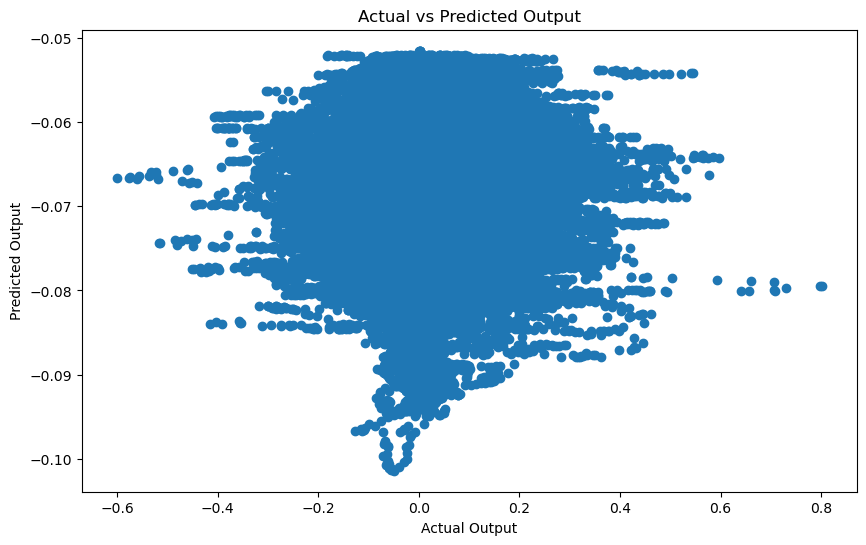

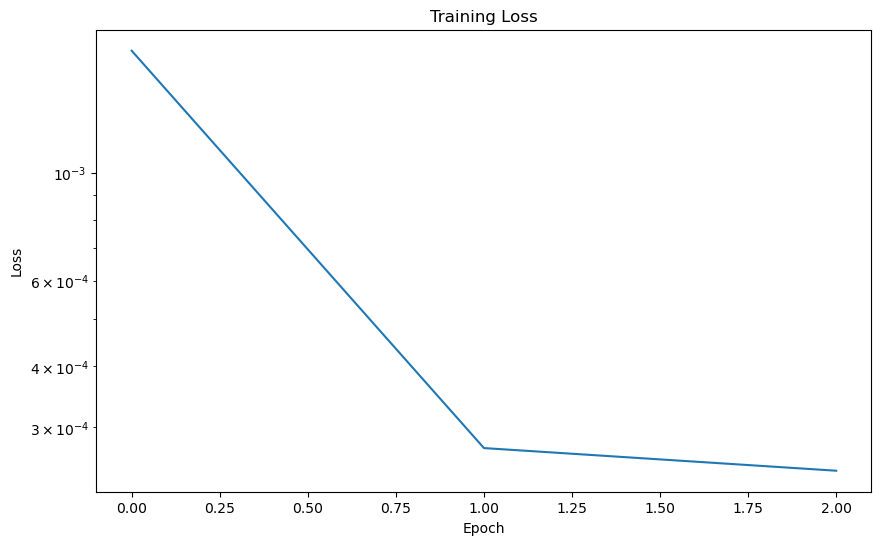

In [24]:
# Plotting the results

plt.figure(figsize=(10, 6))
plt.scatter(pd.DataFrame(y_test).iloc[:,0], predictions1)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual vs Predicted Output')
plt.show()

plt.figure(figsize=(10, 6))
plt.semilogy(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

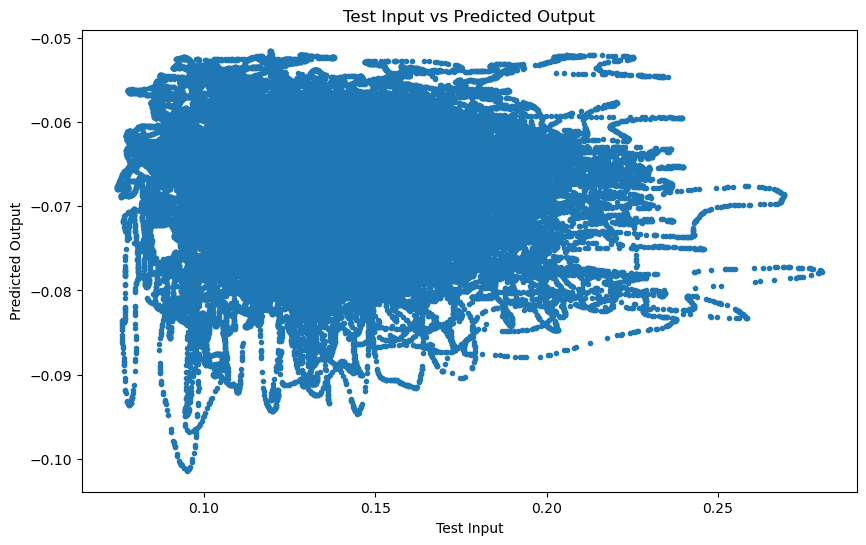

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(pd.DataFrame(X_test).iloc[:,0], predictions1, '.')
plt.xlabel('Test Input')
plt.ylabel('Predicted Output')
plt.title('Test Input vs Predicted Output')
plt.show()

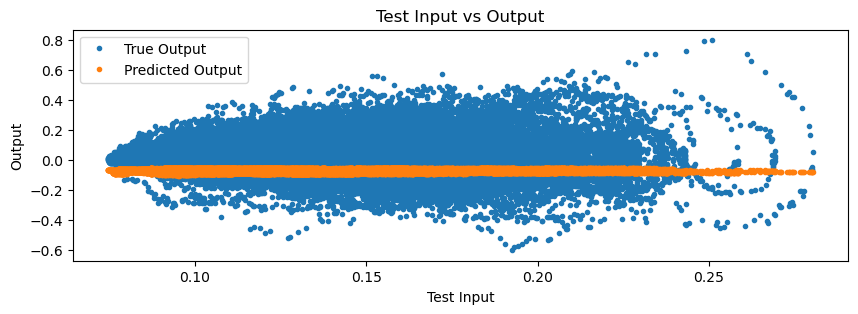

In [29]:
plt.figure(figsize=(10, 3))
#Plot the true output and the predicted output
plt.plot(pd.DataFrame(X_test).iloc[:,0], pd.DataFrame(y_test).iloc[:,0],'.', label='True Output')
plt.plot(pd.DataFrame(X_test).iloc[:,0], predictions1,'.', label='Predicted Output')
plt.xlabel('Test Input')
plt.ylabel('Output')
plt.title('Test Input vs Output')
plt.legend()
plt.show()

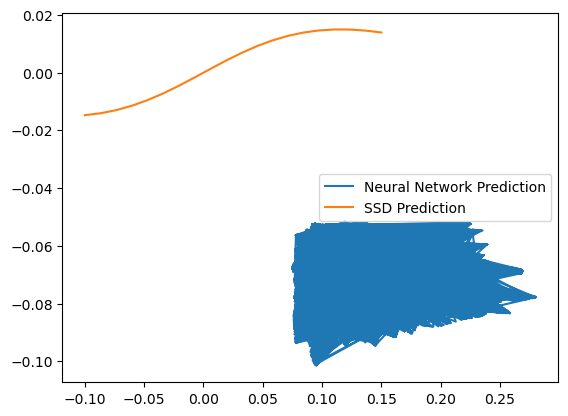

In [32]:
with open("/home/nurul/Codes_Summer/train_test/variables.pickle", "rb") as f:
    R_space, U_space = pickle.load(f)
    
#plt.plot(test_input[sorted_indices], predictions[sorted_indices], label='Neural Network Prediction')
plt.plot(pd.DataFrame(X_test).iloc[:,0], predictions1, label='Neural Network Prediction')
plt.plot(U_space, R_space, label='SSD Prediction')
#plt.ylim(0, 0.02)
plt.legend()
plt.show()

# SIN FUNCTION

In [77]:
data = pd.read_csv('./sinx_train_features.csv')
y = data['y']
X = data.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=42)

In [78]:
X_test.shape

(3999, 23)

In [83]:
model = keras.Sequential([
    keras.layers.Dense(23, activation='linear', input_shape=(23,), kernel_initializer='glorot_normal'),
    keras.layers.Dense(16, activation='tanh', kernel_initializer='glorot_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(1)
])

# Create the optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
epochs = 100  # Number of training iterations
batch_size = 64  # Number of samples per gradient update

# Create a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-12)

# Add the scheduler to the callbacks list
callbacks = [lr_scheduler]

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Make predictions using the trained model
predictions = model.predict(X_test)

Epoch 1/100
75/75 [==============================] - 1s 4ms/step - loss: 1.0520 - val_loss: 0.0535 - lr: 0.0010
Epoch 2/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3854 - val_loss: 0.0241 - lr: 0.0010
Epoch 3/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3569 - val_loss: 0.0108 - lr: 0.0010
Epoch 4/100
75/75 [==============================] - 0s 3ms/step - loss: 0.3127 - val_loss: 0.0080 - lr: 0.0010
Epoch 5/100
75/75 [==============================] - 0s 2ms/step - loss: 0.2815 - val_loss: 0.0083 - lr: 0.0010
Epoch 6/100
75/75 [==============================] - 0s 2ms/step - loss: 0.2511 - val_loss: 0.0082 - lr: 0.0010
Epoch 7/100
75/75 [==============================] - 0s 2ms/step - loss: 0.2154 - val_loss: 0.0065 - lr: 0.0010
Epoch 8/100
75/75 [==============================] - 0s 2ms/step - loss: 0.1964 - val_loss: 0.0063 - lr: 0.0010
Epoch 9/100
75/75 [==============================] - 0s 2ms/step - loss: 0.1586 - val_loss: 0.0061 - lr:

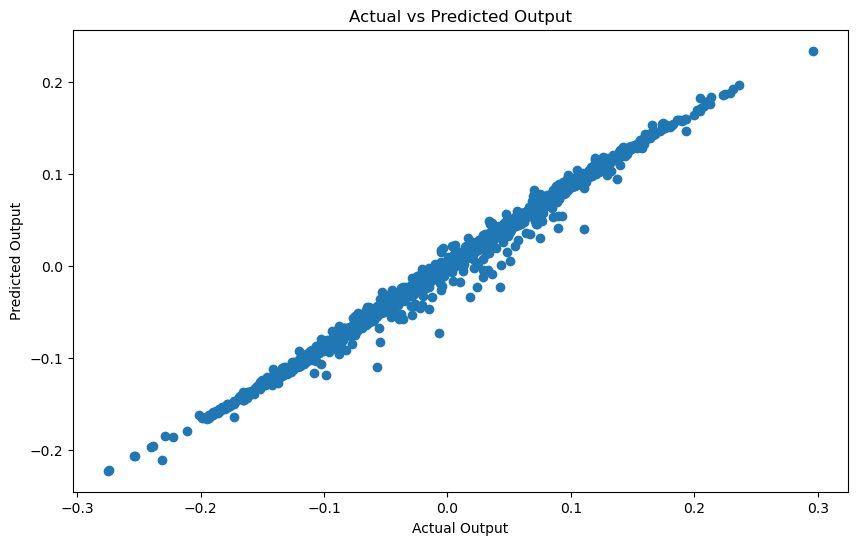

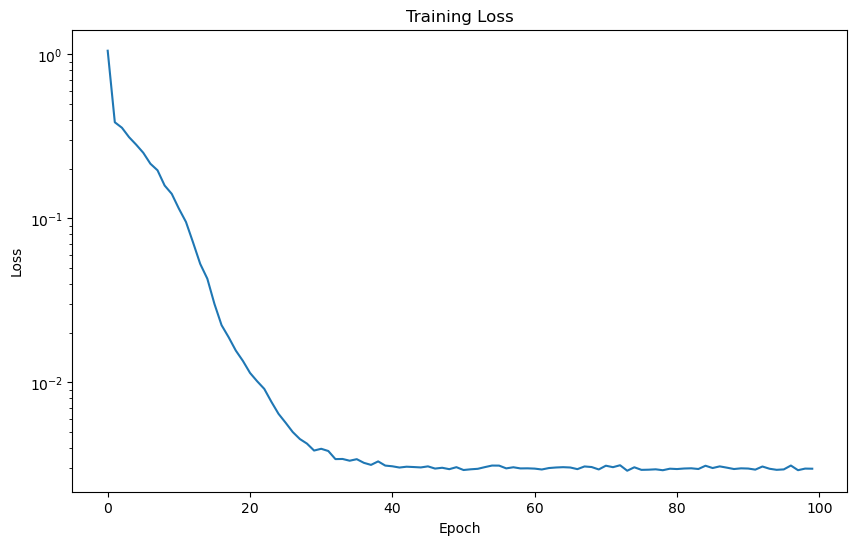

In [84]:
# Plotting the results

plt.figure(figsize=(10, 6))
plt.scatter(pd.DataFrame(y_test).iloc[:,0], predictions)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual vs Predicted Output')
plt.show()

plt.figure(figsize=(10, 6))
plt.semilogy(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

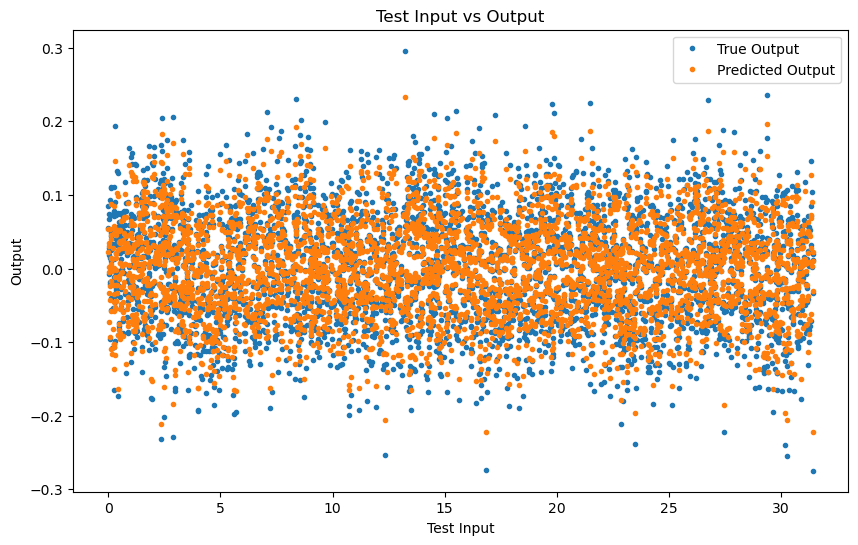

In [85]:
plt.figure(figsize=(10, 6))
#Plot the true output and the predicted output
plt.plot(pd.DataFrame(X_test).iloc[:,0], pd.DataFrame(y_test).iloc[:,0],'.', label='True Output')
plt.plot(pd.DataFrame(X_test).iloc[:,0], predictions,'.', label='Predicted Output')
plt.xlabel('Test Input')
plt.ylabel('Output')
plt.title('Test Input vs Output')
#plt.ylim(-0.01,0.01)
plt.legend()
plt.show()